In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from numpy.random import multivariate_normal
from matplotlib.colors import LogNorm

### Read the actual data

In [2]:
os.listdir('data/labelledData')

['fit_results_run_30383_no_avg_labelled_tails.csv',
 'fit_results_run_30400_no_avg_labelled_tails.csv',
 'fit_results_run_30389_no_avg_labelled_tails.csv',
 'fit_results_run_30405_no_avg_labelled_tails.csv',
 'kde_samples_c3_labelled_tails.csv',
 'fit_results_run_30418_no_avg_labelled_tails.csv',
 'fit_results_run_30373_no_avg_labelled_tails.csv',
 'fit_results_run_30360_no_avg_labelled_tails.csv',
 'fit_results_run_30402_no_avg_labelled_tails.csv',
 'fit_results_run_30416_no_avg_labelled_tails.csv',
 'fit_results_run_30387_no_avg_labelled_tails.csv',
 'fit_results_run_30421_no_avg_labelled_tails.csv',
 'fit_results_run_30426_no_avg_labelled_tails.csv',
 'fit_results_run_30398_no_avg_labelled_tails.csv',
 'fit_results_run_30404_no_avg_labelled_tails.csv',
 'fit_results_run_30414_no_avg_labelled_tails.csv',
 'kde_samples_c1_labelled_tails.csv',
 'fit_results_run_30378_no_avg_labelled_tails.csv',
 'fit_results_run_30394_no_avg_labelled_tails.csv',
 'kde_samples_c2_labelled_tails.csv',
 '

In [34]:
# tmpdf = pd.read_csv('data/labelledData/fit_results_run_30400_no_avg_labelled_tails.csv')
tmpdf = pd.DataFrame()
for i,f in enumerate(os.listdir('data/labelledData')):
    if i==0:
        tmpdf = pd.read_csv(f'data/labelledData/{f}')
    # elif i==1:
    else:
        tmpdf = pd.concat([tmpdf, pd.read_csv(f'data/labelledData/{f}')], axis=0)
colmns = tmpdf.columns
tmpdf.drop(columns=colmns[0], inplace=True)
cols_of_interest = ['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6']
# data_df = tmpdf[tmpdf['class'=='c2']]
# data_df = tmpdf.copy()
# data_df.head()
data_df = tmpdf[tmpdf['class']=='c1'].copy()

## Visualize data

In [35]:
def visualize(data, columns, type):
    '''
       data: the dataframe to visualize
       columns: the columns of interest
       type: the type of plot to generate. The following options are supported:
            - hist: for 1d histograms (distribution)
            - corr: for 2d histograms showing the correlation between variables
    '''
    N_var = len(columns)
    if type=='hist':
        fig, ax = plt.subplots(1, N_var, figsize=(5*N_var, 5))
        for i, c in enumerate(columns):
            # ax[i].hist(data[c], bins=int(len(data[c])/20), histtype='step')
            ax[i].hist(data[c], bins=100, histtype='step')
            ax[i].set_xlabel(c)
            ax[i].set_ylabel('#')
            ax[i].set_title(c)
            ax[i].grid(True)
        plt.tight_layout()
        plt.show()
    elif type=='corr':
        for c1 in cols_of_interest:
            fig, ax = plt.subplots(1, N_var, figsize=(5*N_var, 5))
            for i, c2 in enumerate(cols_of_interest):
                h1 = ax[i].hist2d(data[c1], data[c2], 
                bins=30, norm=LogNorm(),cmap='viridis')
                cbar1 = plt.colorbar(h1[3])
                cbar1.set_label('Counts')
                ax[i].set_xlabel(c1)
                ax[i].set_ylabel(c2)
                ax[i].set_title(f'{c1} vs {c2}')
                ax[i].grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Invalid type.")

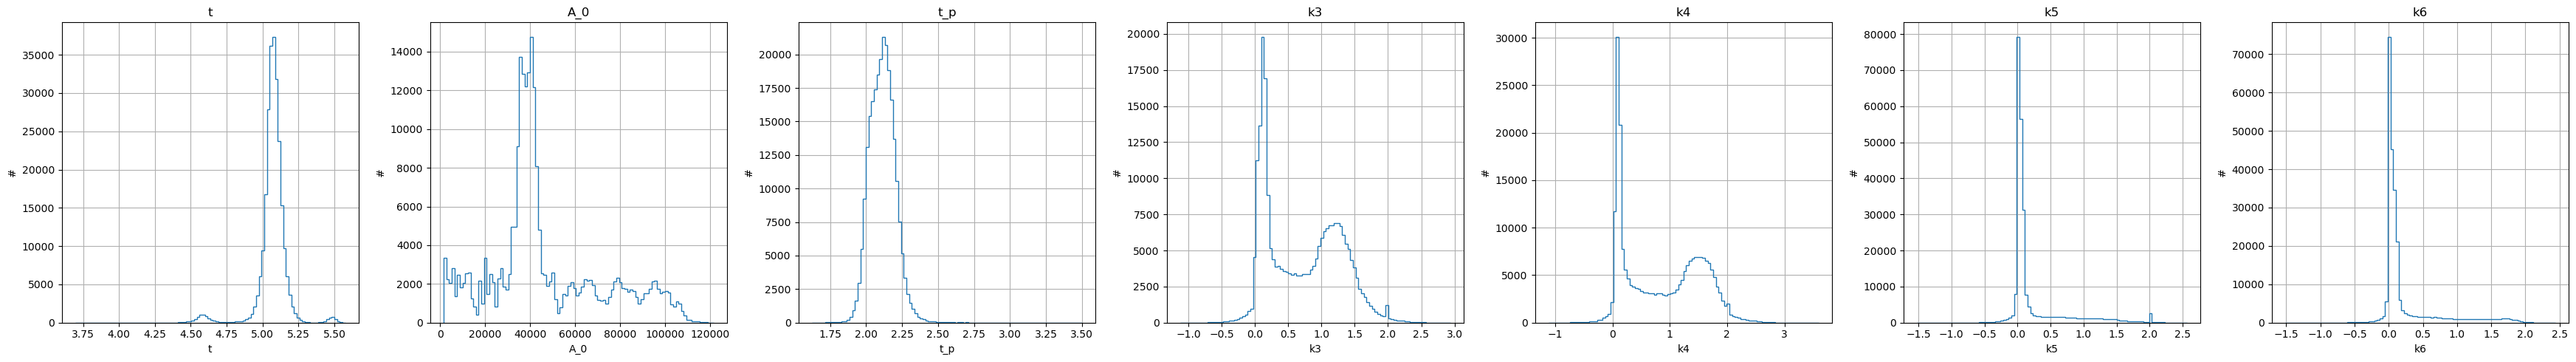

In [36]:
visualize(data=data_df, columns=cols_of_interest, type='hist')

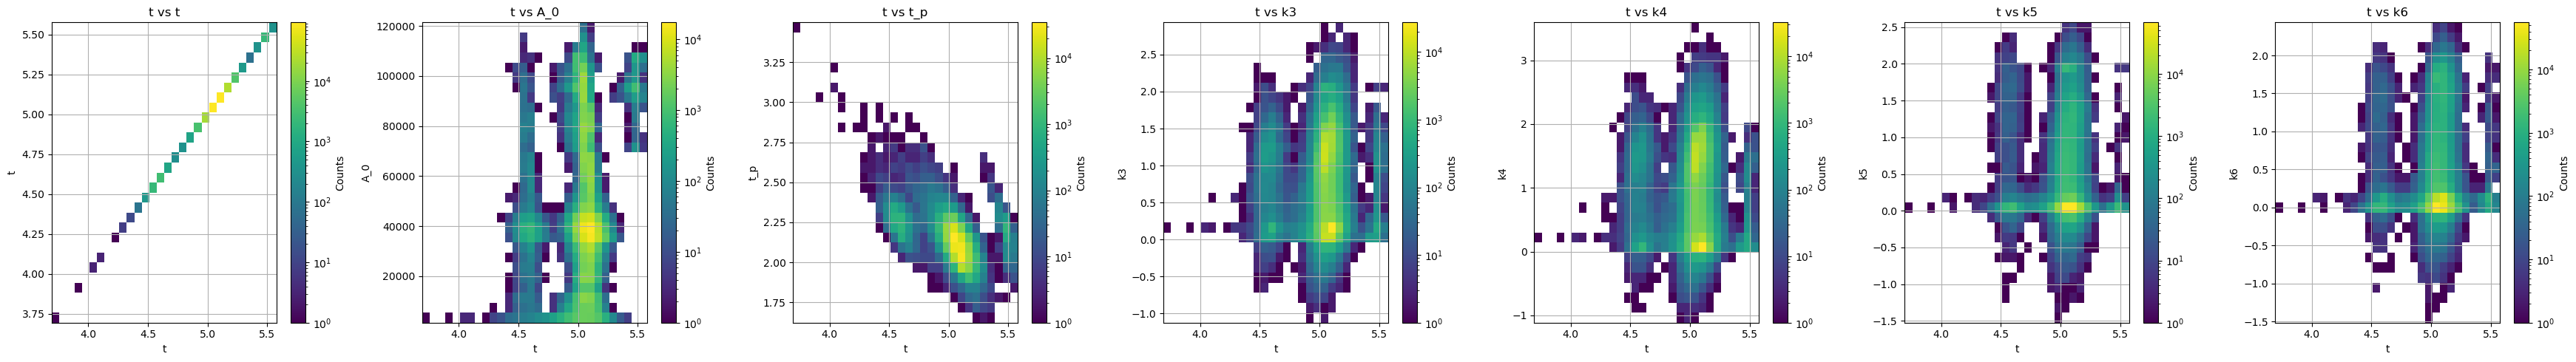

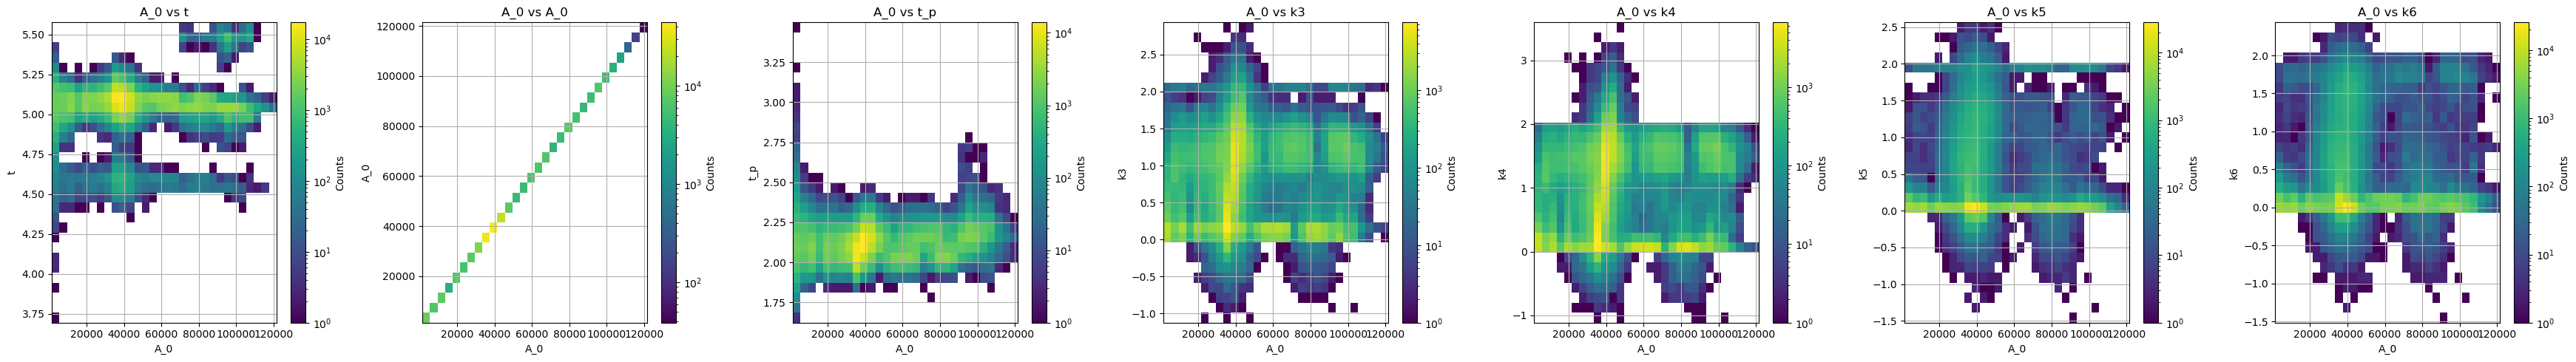

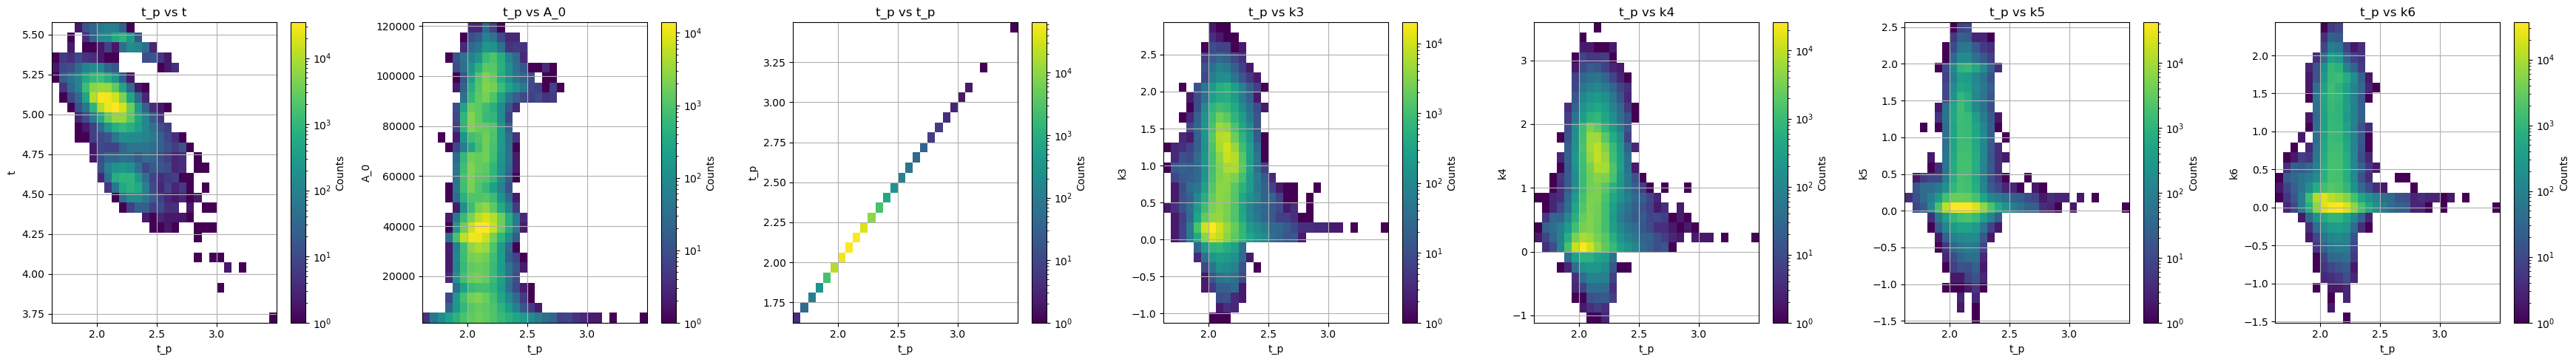

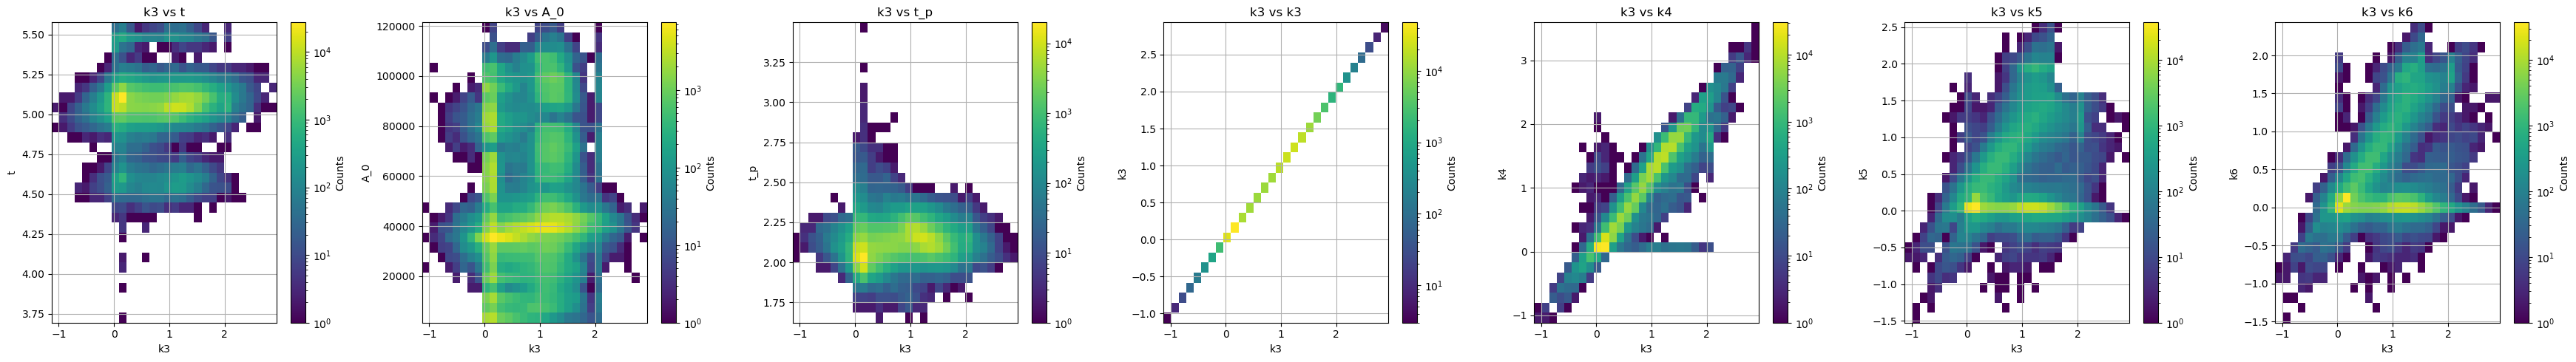

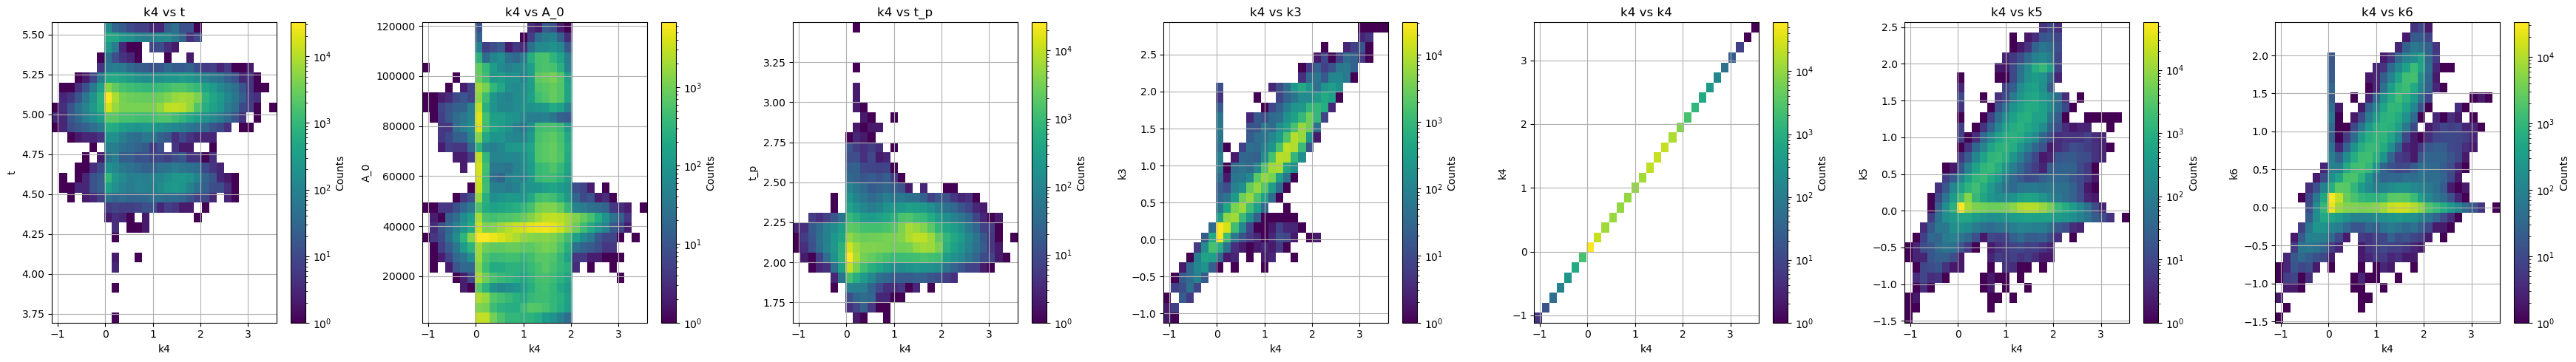

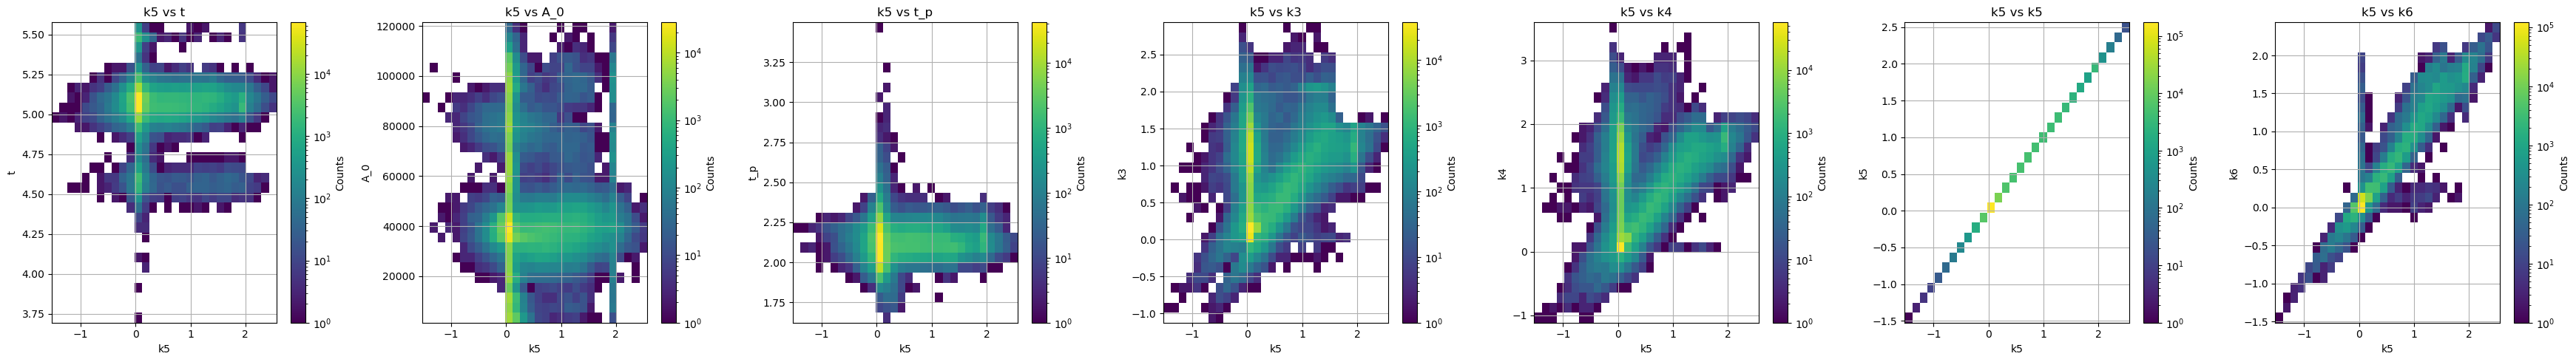

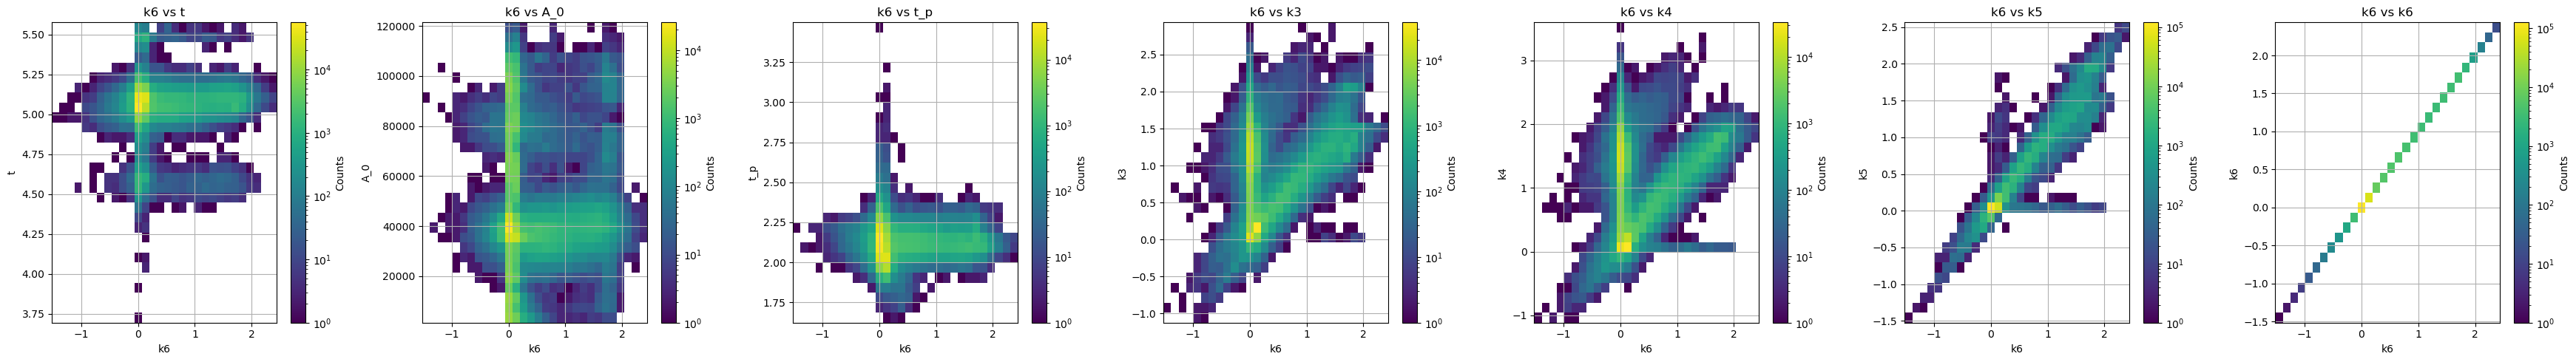

In [37]:
visualize(data=data_df, columns=cols_of_interest, type='corr')

## Multivariate Gaussian Distribution
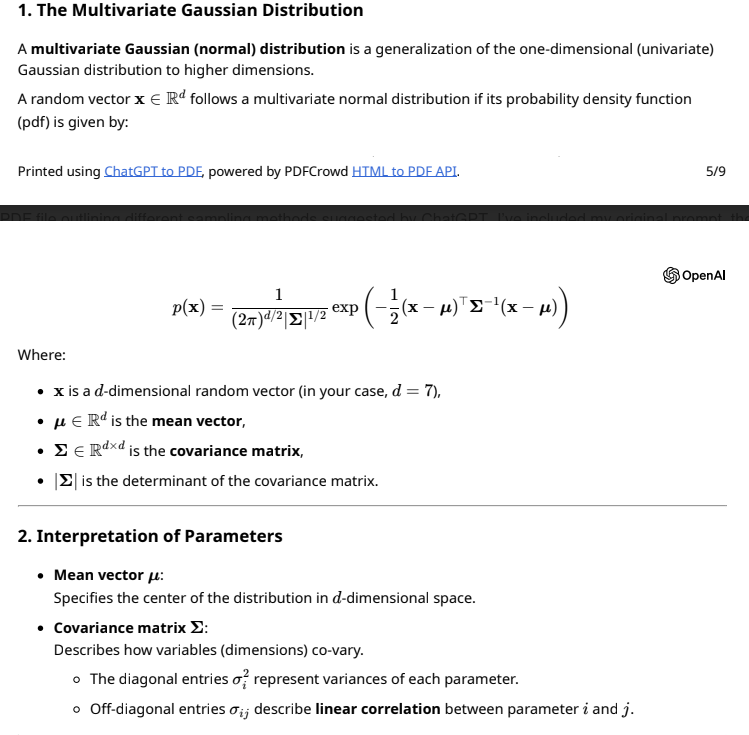 <br/>
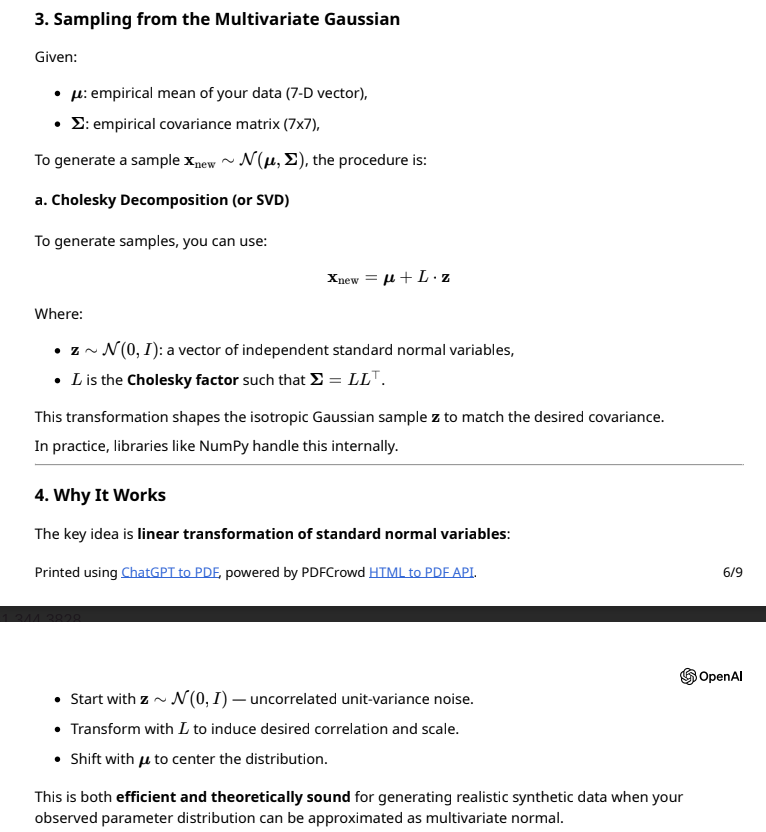

In [65]:
def MultivariateGaussian(df, columns, n_samples):
    data = df[columns].to_numpy()
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    samples = multivariate_normal(mean, cov, n_samples)
    new_df = pd.DataFrame(samples, columns=columns)
    return new_df

In [56]:
multivar_df = MultivariateGaussian(df=data_df, columns=cols_of_interest, n_samples=10000)

In [57]:
multivar_df

,t,A_0,t_p,k3,k4,k5,k6
0,5.000309,43138.726038,2.356935,1.541607,1.930464,0.120300,0.112988
1,5.208877,41014.462469,2.113224,1.230189,1.381775,0.686392,0.801980
2,5.147518,38675.440524,2.107162,0.631518,0.767897,0.202877,0.258076
3,4.973355,42143.416276,2.191000,1.198557,1.628747,-0.065987,-0.100632
4,5.055273,35329.514533,2.006924,-0.408337,-0.501188,-0.032803,0.064873
...,...,...,...,...,...,...,...
9995,5.159622,42573.152938,2.158102,1.226689,1.628702,-0.087914,-0.119085
9996,5.124063,36751.090311,2.065027,0.561900,0.649066,0.563026,0.585170
9997,5.042156,39288.267188,2.144993,1.149486,1.416774,0.855325,0.861502
9998,4.878552,40628.159187,2.256235,1.231713,1.461076,-0.132717,-0.103394


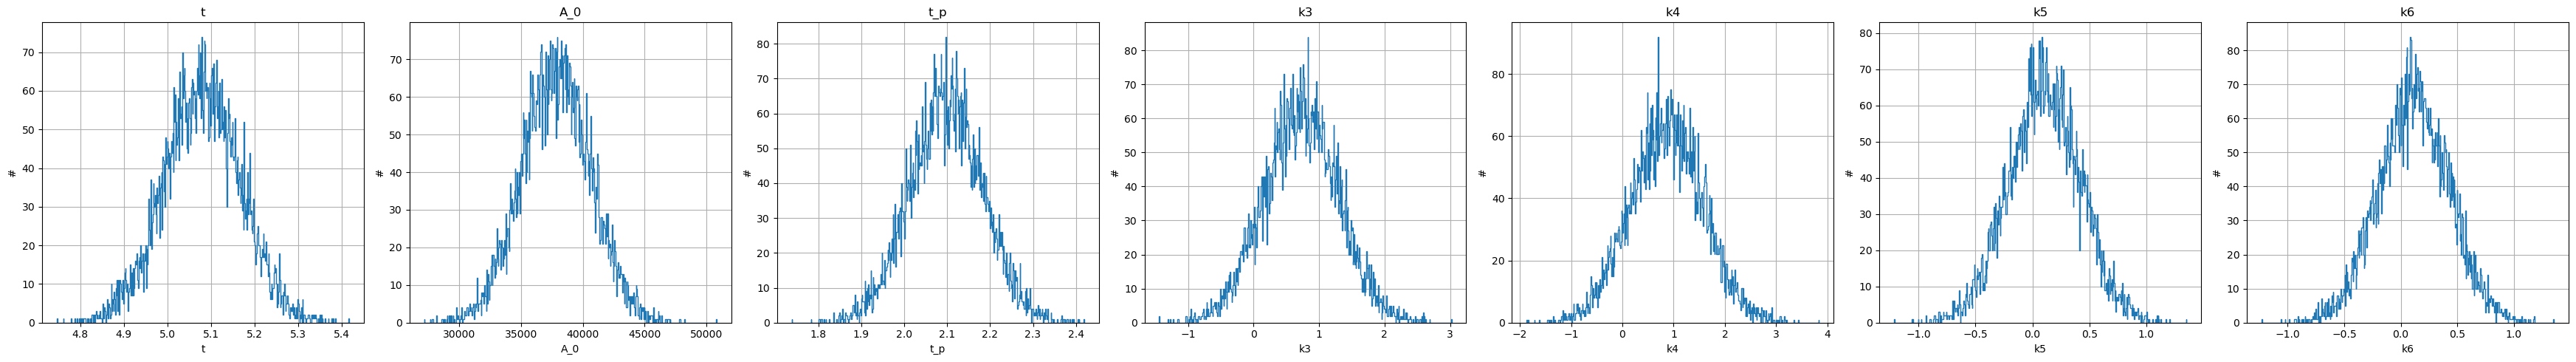

In [58]:
visualize(data=multivar_df, columns=cols_of_interest, type='hist')

In [171]:
visualize(data=multivar_df, columns=cols_of_interest, type='corr')

NameError: name 'multivar_df' is not defined

## Kernel Density Estimation
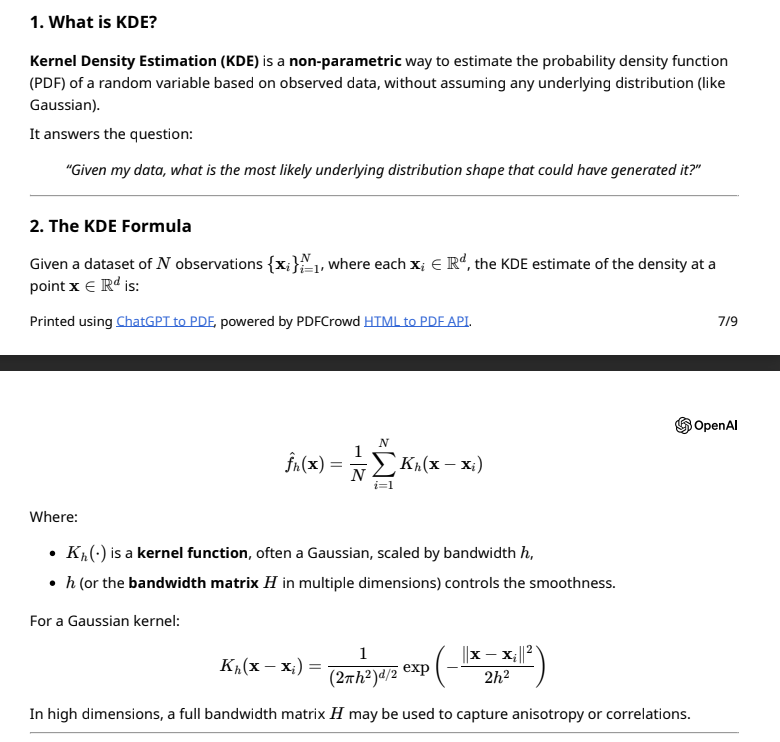 <br/>
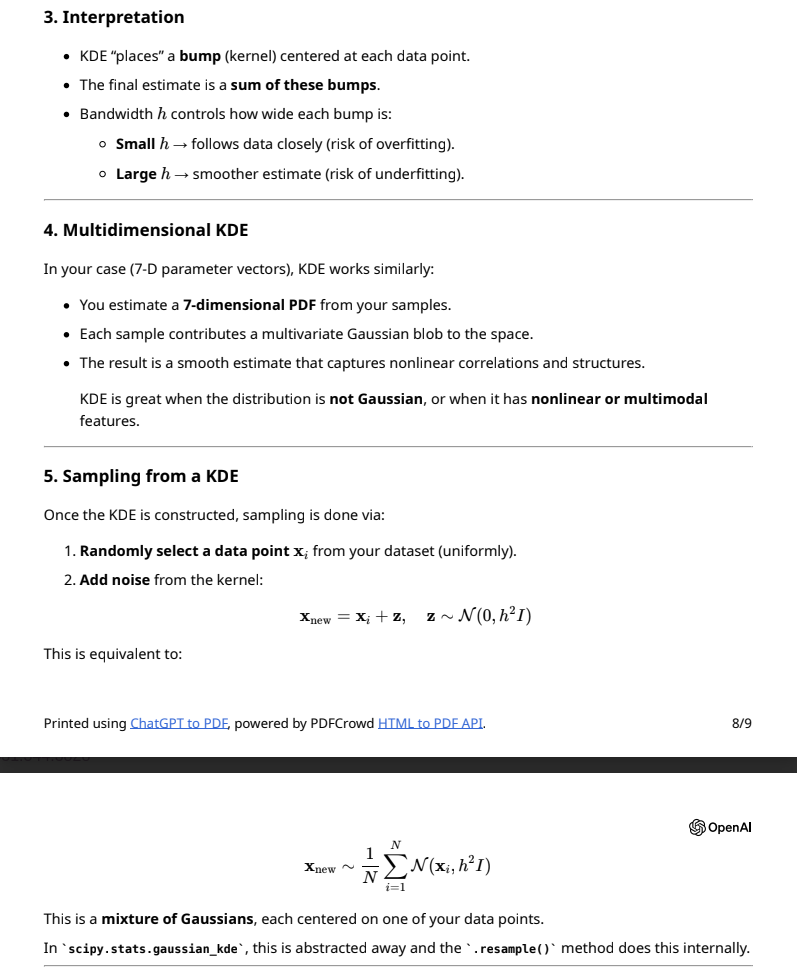

In [38]:
from scipy.stats import gaussian_kde

def KDE_sampling(df, columns, n_samples):
    data = df[columns].to_numpy()
    data_T = data.T
    kde = gaussian_kde(data_T, bw_method='scott')
    # kde = gaussian_kde(data_T, bw_method=0.05)
    new_samples = kde.resample(n_samples)
    new_samples = new_samples.T
    new_df = pd.DataFrame(new_samples, columns=columns)
    return new_df

In [39]:
n_samples = 100000
kde_df = KDE_sampling(df=data_df, columns=cols_of_interest, n_samples=n_samples)

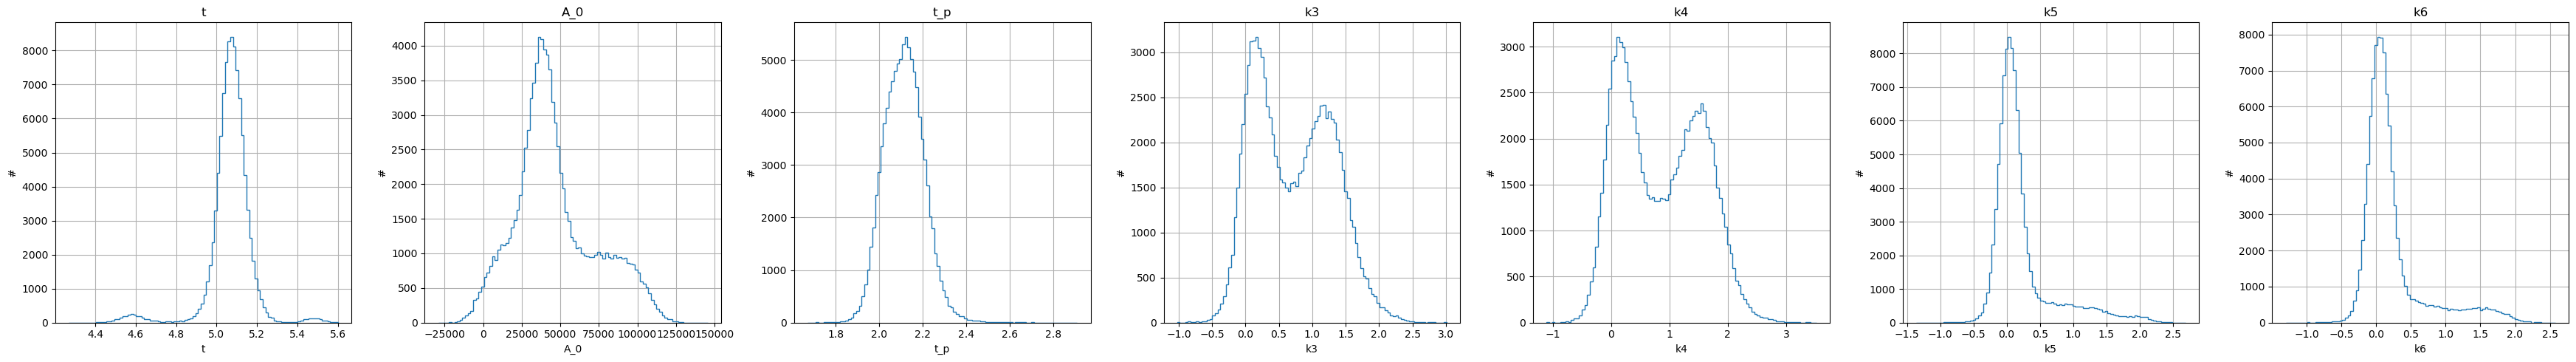

In [40]:
visualize(data=kde_df, columns=cols_of_interest, type='hist')

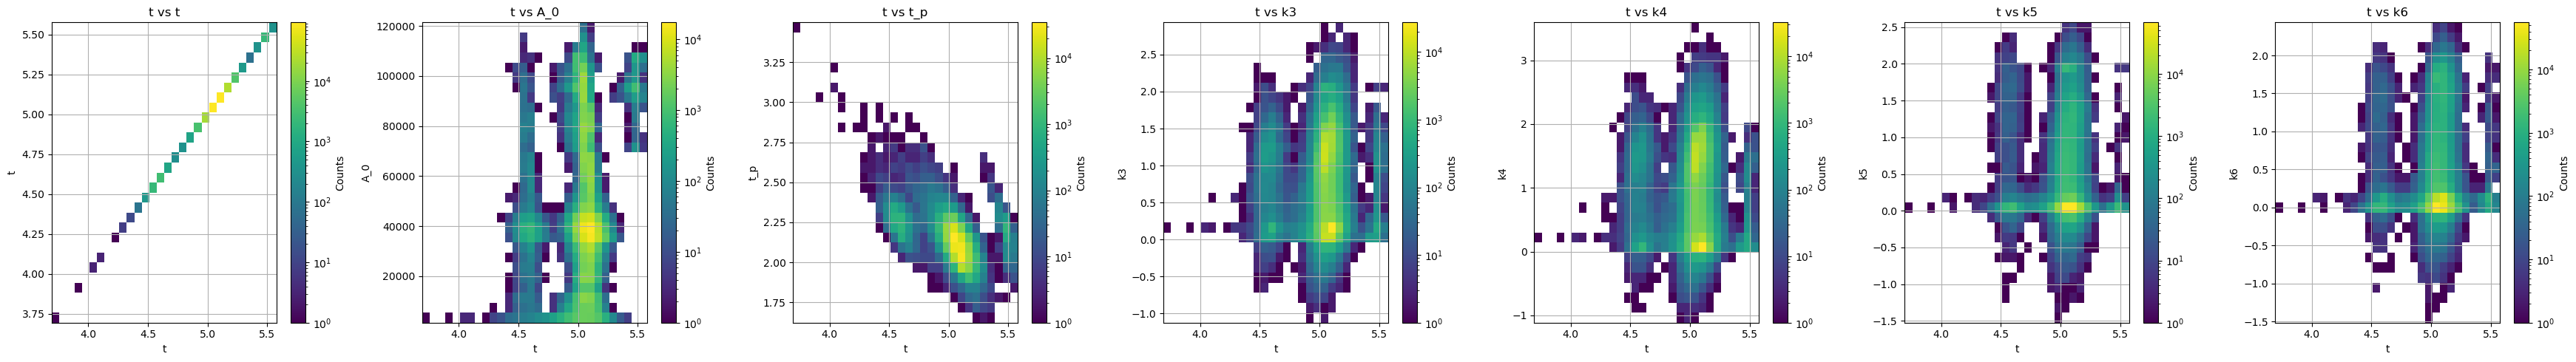

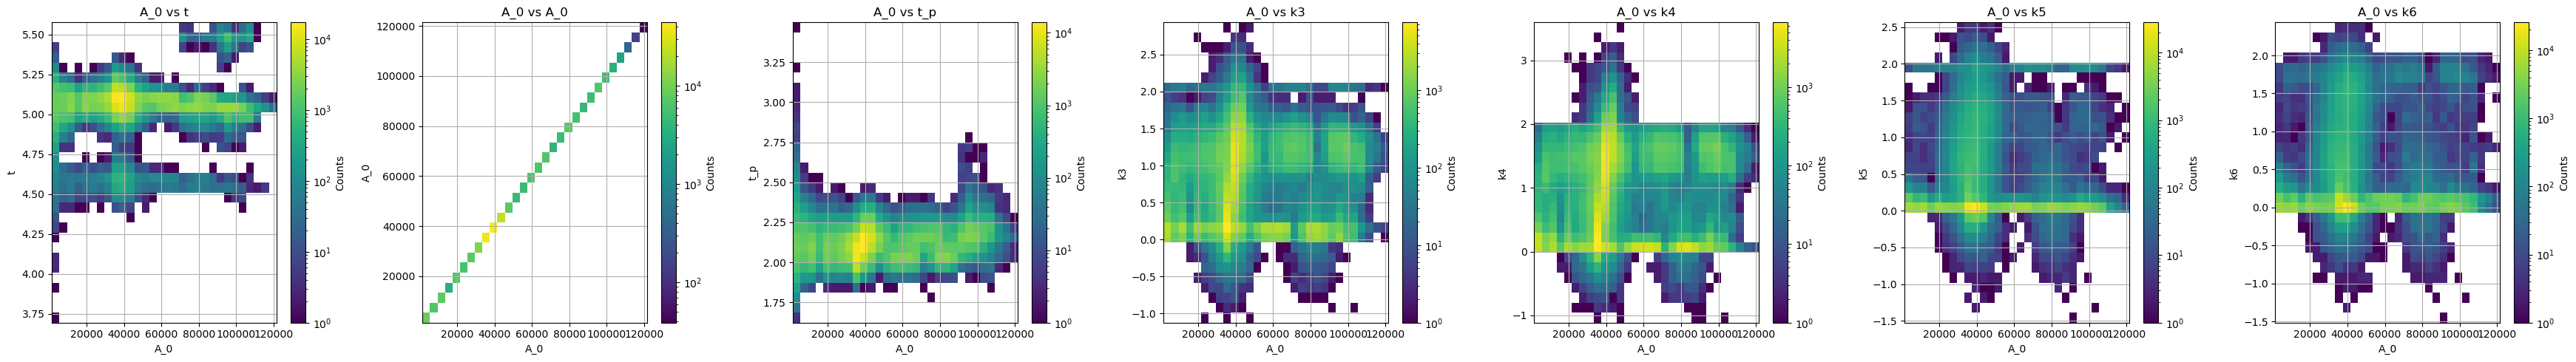

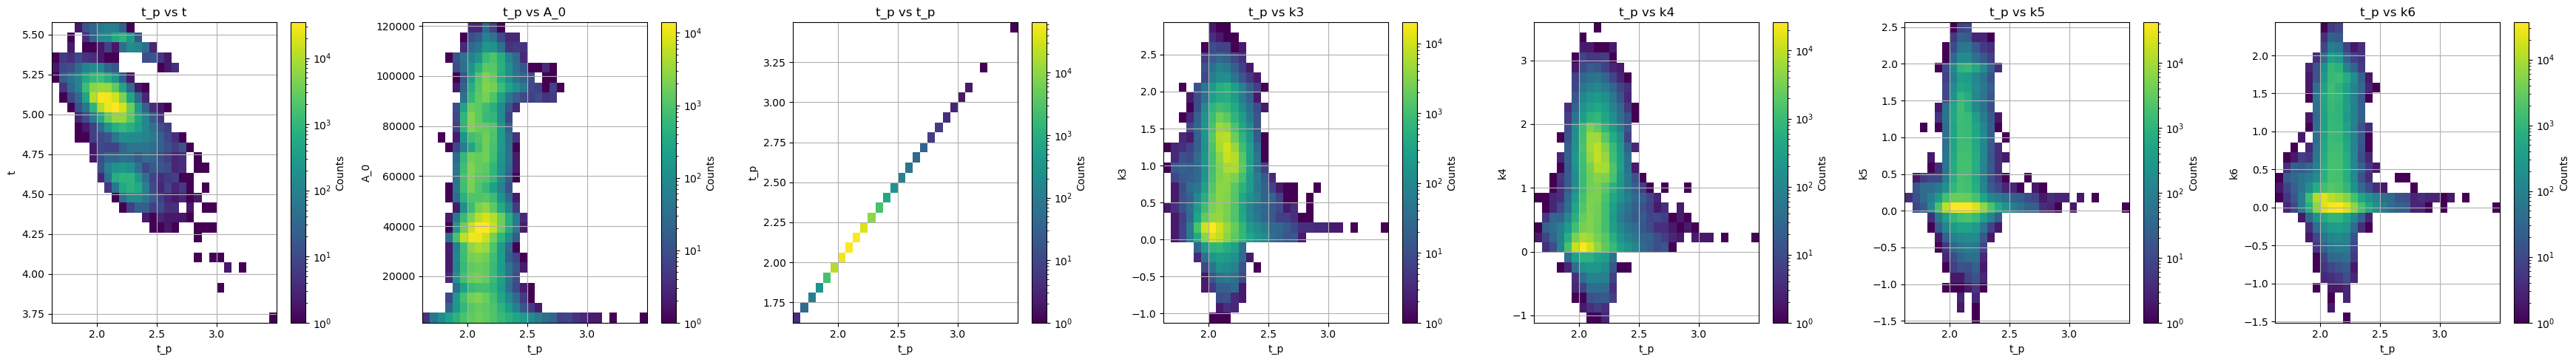

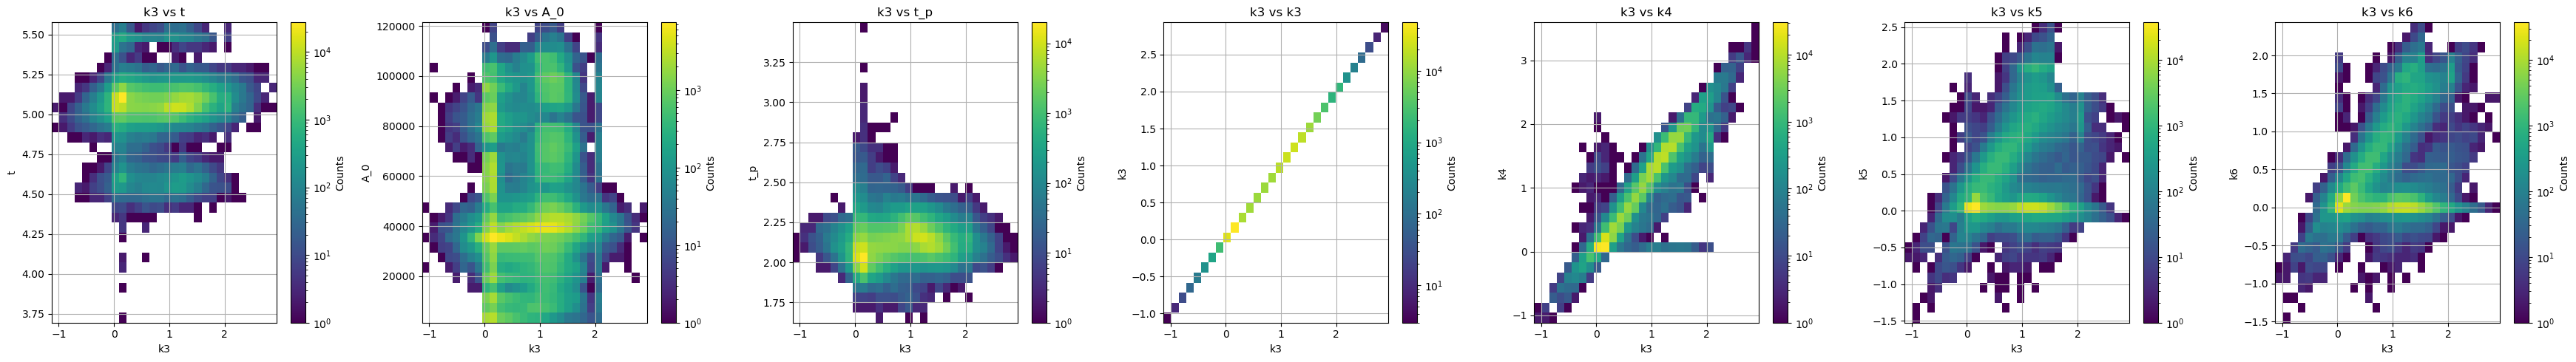

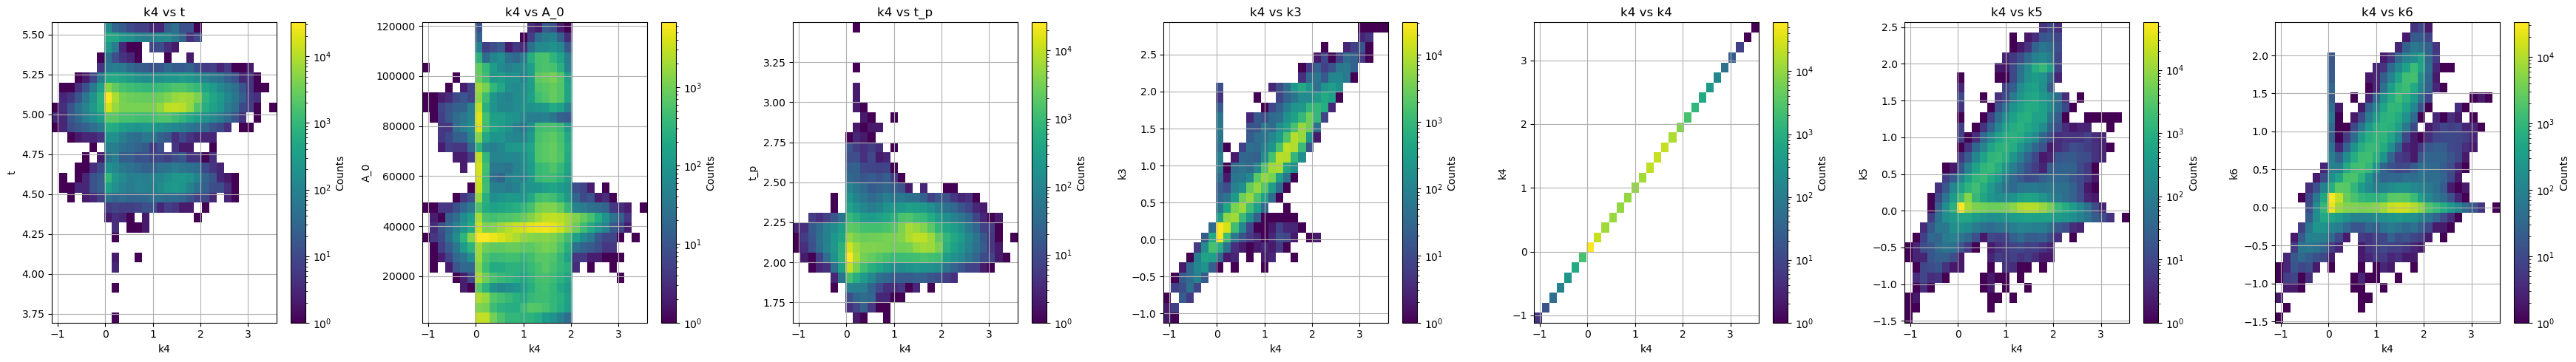

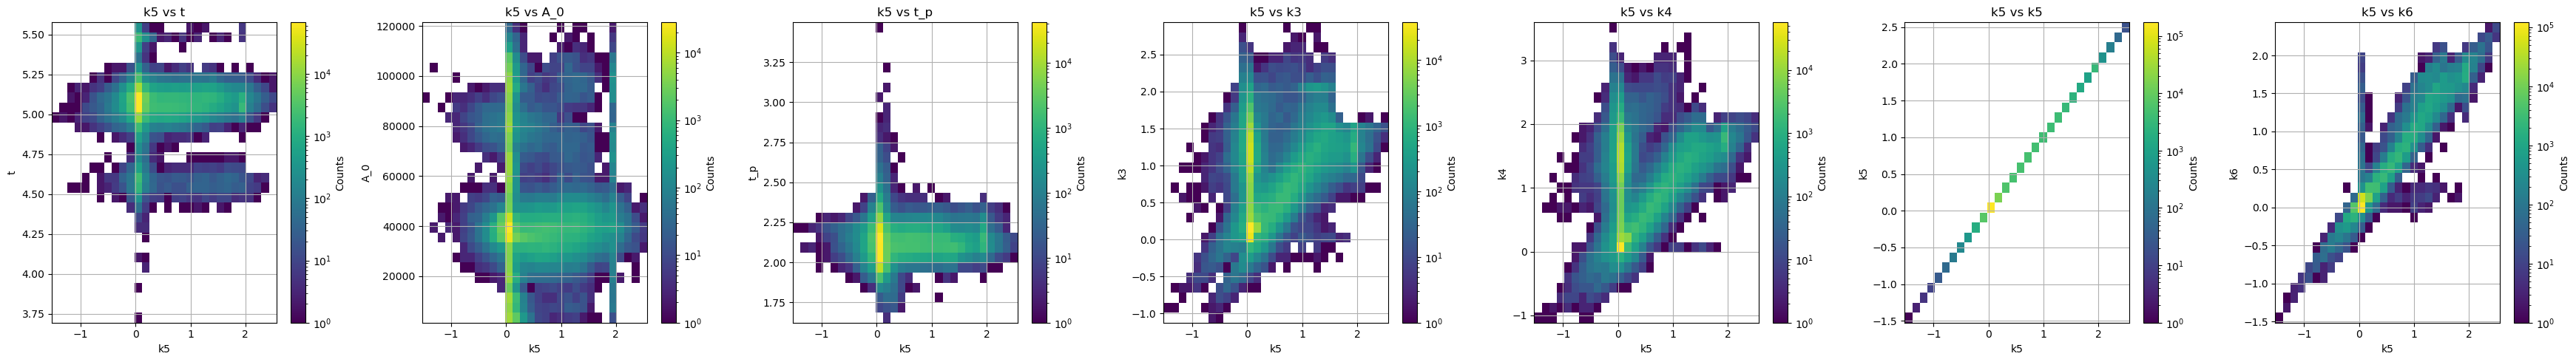

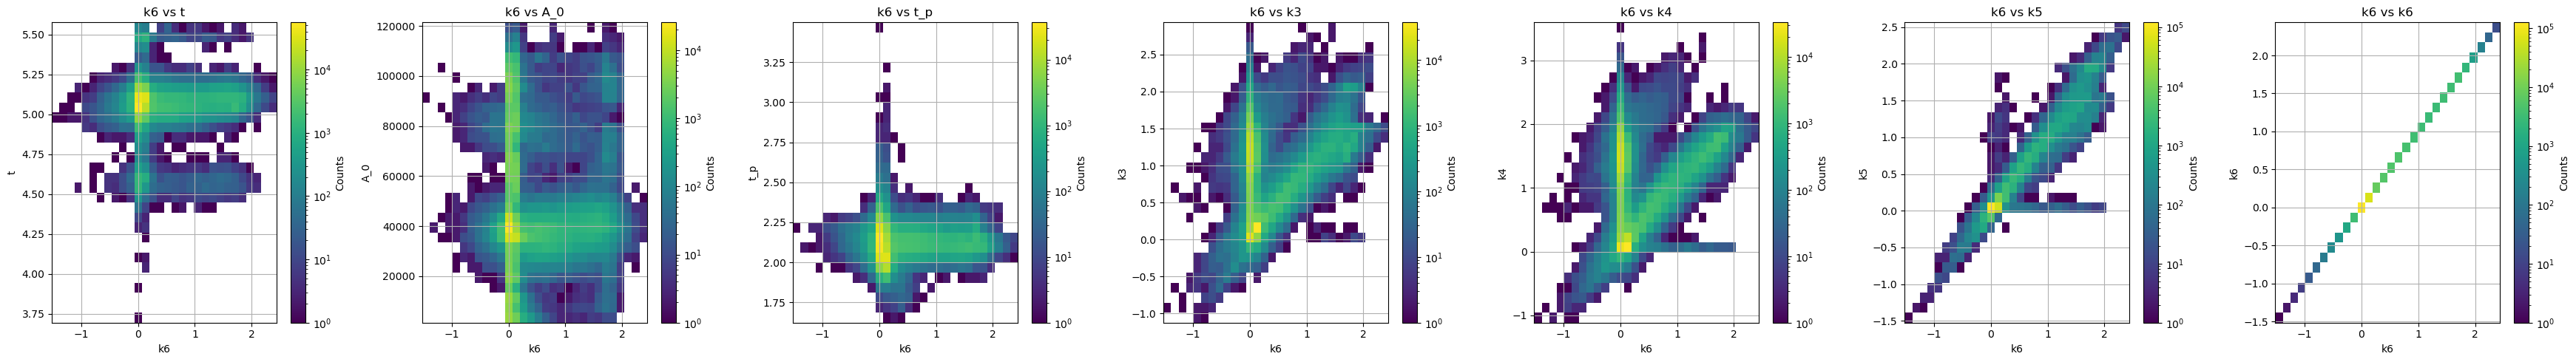

In [41]:
visualize(data=data_df, columns=cols_of_interest, type='corr')

**From the distributions of the parameters and the plots of the correlation between them, I think I can say that the KDE sampling is the way to go. I still need to validate the result to the BDT to see if that improves our results though.**

In [42]:
kde_df.to_csv('data/kde_syntheticdata/kde_samples_c1.csv', index=False)